#911 Emergency call dataset . Montgomery ==> 2015 to 2020

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set(style='darkgrid')

#Loading Dataset

In [4]:
data = pd.read_csv('911.csv')
print('Number of Rows = ',data.shape[0])
print('Number of Columns = ',data.shape[1])

Number of Rows =  663522
Number of Columns =  9


In [5]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


In [7]:
#Deleting a coloumn from dataset
data.drop('e',axis=1,inplace=True)

In [8]:
#changing the datatype of 'timestamp'
data['timeStamp'] = pd.to_datetime(data['timeStamp'])

In [9]:
mindate = data['timeStamp'].min()
mindate

Timestamp('2015-12-10 14:39:21')

In [12]:
maxdate = data['timeStamp'].max()
maxdate

Timestamp('2020-07-29 15:54:08')

#Missing Values

In [13]:
print('Number of Missing Values = ',data.isnull().values.sum())

Number of Missing Values =  80492


In [14]:
#how many zip codes?
data['zip'].nunique()

204

In [15]:
#top 5 zip codes for 911 call?
data['zip'].value_counts().head()
data_zip = pd.DataFrame(data['zip'].value_counts().head())
data_zip.style.background_gradient(cmap='Reds')

,count
zip,
19401.000000,45606
19464.000000,43910
19403.000000,34888
19446.000000,32270
19406.000000,22464


In [16]:
#top 5 township for 911 call?
data['twp'].value_counts().head()

,count
twp,
LOWER MERION,55490
ABINGTON,39947
NORRISTOWN,37633
UPPER MERION,36010
CHELTENHAM,30574


In [17]:
# Creating New Feature : creating a new coloumn from
# title and named it to reason which will tell type of emergency
data["reason"] = data["title"].apply(lambda title : title.split(':')[0])
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS


In [18]:
#Creating New Feature : creating a new coloumn from title and named
# it to subreason which will tell description of emergency
data["subreason"] = data["title"].apply(lambda title : title.split(':')[1])
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,subreason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS


<Axes: ylabel='count'>

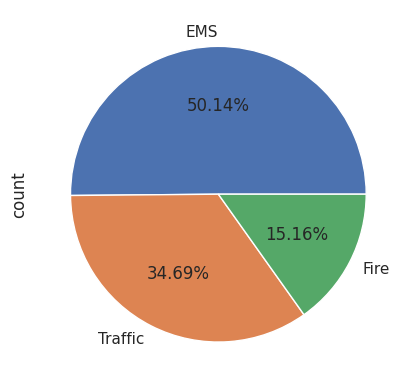

In [19]:
#EDA : Exploratory Data Analysis
# What is the most reason for 911 call based on coumn 'reason'?
data['reason'].value_counts().plot(kind = 'pie',autopct = '%1.2f%%')

<Axes: xlabel='reason', ylabel='count'>

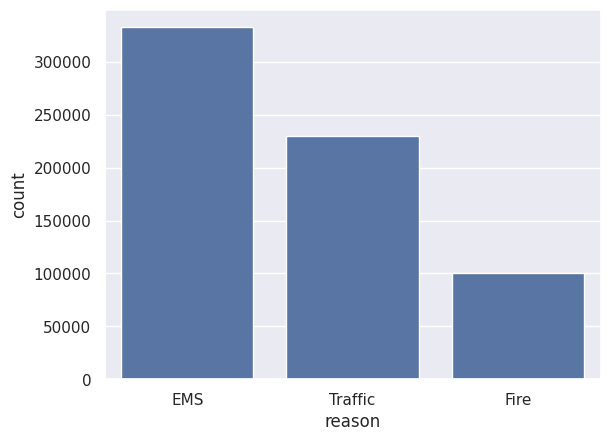

In [20]:
sns.countplot(x='reason', data=data, order = data['reason'].value_counts().index)

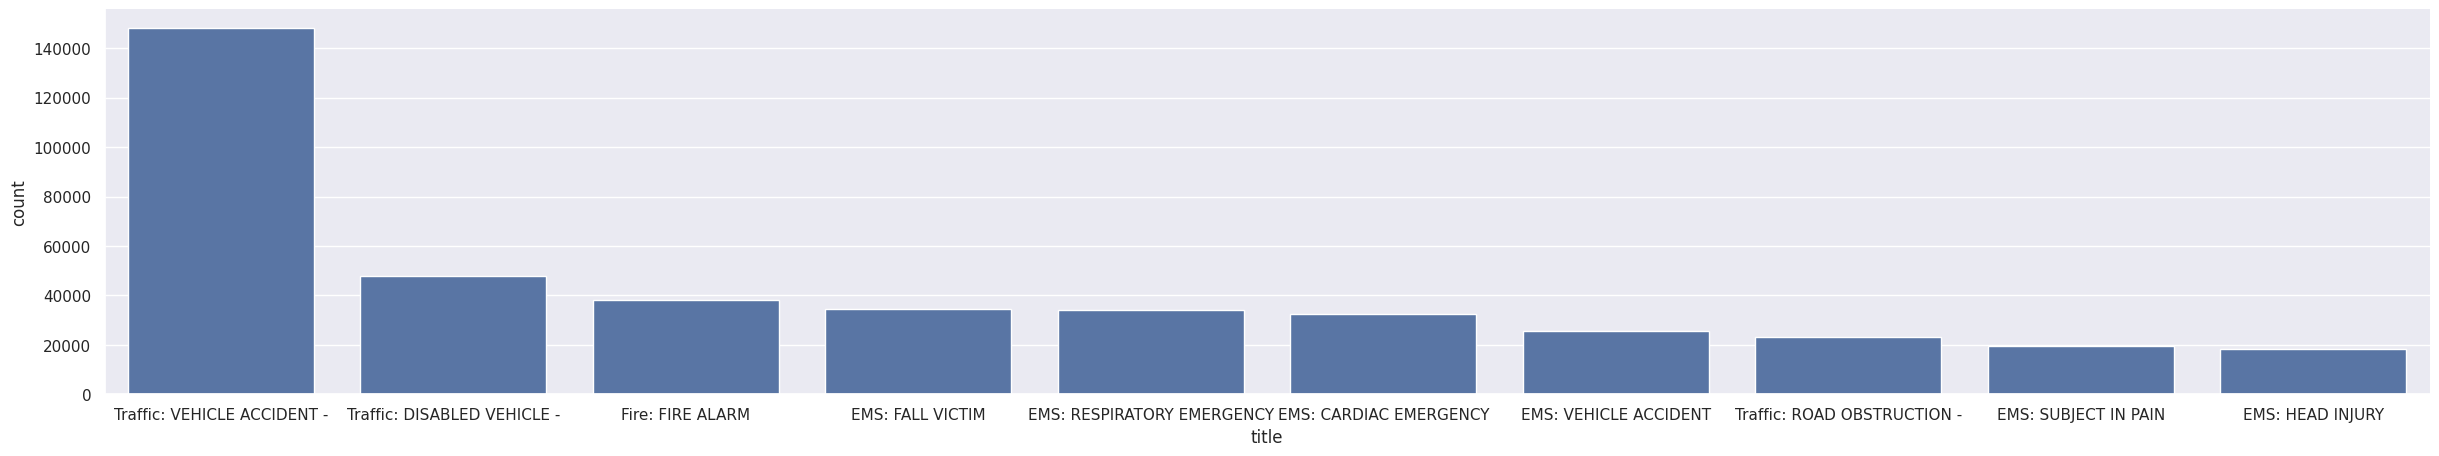

In [21]:
# top 10 emergency call barchart
fig , axes = plt.subplots(figsize=(30,5))
sns.countplot(x='title', data=data, order = data['title'].value_counts().head(10).index)
sns.despine(top = True, right = True, left = False, bottom = False)


In [22]:
#Trafic 911 calls
data[data['reason']=='Traffic'].groupby('subreason').count()['title'].sort_values(ascending=False).head()

,title
subreason,
VEHICLE ACCIDENT -,148372
DISABLED VEHICLE -,47909
ROAD OBSTRUCTION -,23235
HAZARDOUS ROAD CONDITIONS -,6833
VEHICLE FIRE -,3366


In [23]:
#Fire 911 calls
data[data['reason']=='Fire'].groupby('subreason').count()['title'].sort_values(ascending=False).head()

,title
subreason,
FIRE ALARM,38336
VEHICLE ACCIDENT,10864
FIRE INVESTIGATION,9444
GAS-ODOR/LEAK,6740
ELECTRICAL FIRE OUTSIDE,5111


In [24]:
#EMS 911 calls
data[data['reason']=='EMS'].groupby('subreason').count()['title'].sort_values(ascending=False).head()

,title
subreason,
FALL VICTIM,34676
RESPIRATORY EMERGENCY,34248
CARDIAC EMERGENCY,32332
VEHICLE ACCIDENT,25513
SUBJECT IN PAIN,19646


In [25]:
#Features Engineering :
data['Day of week'] = data['timeStamp'].apply(lambda time : time.dayofweek)
data['Month'] = data['timeStamp'].apply(lambda time : time.month)
data['Hour'] = data['timeStamp'].apply(lambda time : time.hour)

In [26]:
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,subreason,Day of week,Month,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,3,12,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,3,12,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,3,12,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,3,12,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,3,12,16


In [27]:
# Identify days of week
d = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
data['Day of week'] = data['Day of week'].map(d)
data.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,reason,subreason,Day of week,Month,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,EMS,BACK PAINS/INJURY,Thursday,12,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,EMS,DIABETIC EMERGENCY,Thursday,12,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,Fire,GAS-ODOR/LEAK,Thursday,12,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,EMS,CARDIAC EMERGENCY,Thursday,12,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,EMS,DIZZINESS,Thursday,12,16


<Axes: xlabel='Hour', ylabel='Day of week'>

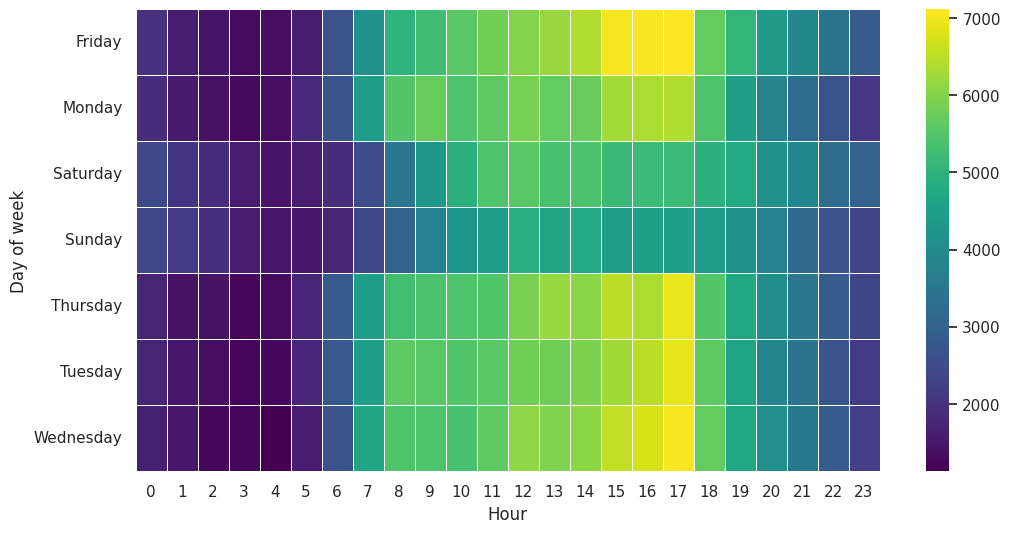

In [28]:
# on what day and time the most number of calls connected to 911 .. HeatMap
dayHour = data.groupby(by=['Day of week','Hour']).count()['reason'].unstack()
plt.figure(figsize=(12,6))
sns.heatmap(dayHour,cmap='viridis',linecolor='white',linewidths=0.5)